In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
def read(file_path):
    data = pd.read_csv(file_path)
    return(data) 

In [3]:
data= read('../files_for_project/regression_data.csv')

In [4]:
#checking if there are no unique id's
data['id'].value_counts()
#yes there are id's,which are more often than one time

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [5]:
data[data['id']==795000620]
#they seemto be for the same house, which is sold more than once

id        date  bedrooms bathrooms  sqft_living  sqft_lot  \
17588  795000620   9/24/2014         3         1         1080      6250   
17589  795000620  12/15/2014         3         1         1080      6250   
17590  795000620   3/11/2015         3         1         1080      6250   

      floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
17588      1           0     0          2  ...        1080              0   
17589      1           0     0          2  ...        1080              0   
17590      1           0     0          2  ...        1080              0   

       yr_built  yr_renovated  zipcode      lat     long sqft_living15  \
17588      1950             0    98168  47,5045  -122,33          1070   
17589      1950             0    98168  47,5045  -122,33          1070   
17590      1950             0    98168  47,5045  -122,33          1070   

       sqft_lot15   price  
17588        6250  115000  
17589        6250  124000  
17590        6250  157000  

[3 rows x 21 columns]

In [6]:
data.info

<bound method DataFrame.info of                id        date  bedrooms bathrooms  sqft_living  sqft_lot  \
0      7129300520  10/13/2014         3         1         1180      5650   
1      6414100192   12/9/2014         3      2,25         2570      7242   
2      5631500400   2/25/2015         2         1          770     10000   
3      2487200875   12/9/2014         4         3         1960      5000   
4      1954400510   2/18/2015         3         2         1680      8080   
...           ...         ...       ...       ...          ...       ...   
21592   263000018   5/21/2014         3       2,5         1530      1131   
21593  6600060120   2/23/2015         4       2,5         2310      5813   
21594  1523300141   6/23/2014         2      0,75         1020      1350   
21595   291310100   1/16/2015         3       2,5         1600      2388   
21596  1523300157  10/15/2014         2      0,75         1020      1076   

      floors  waterfront  view  condition  ...  sqft_ab

In [7]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [8]:
data.isna().sum() #no nulls in the data

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [9]:
data.dtypes

id                int64
date             object
bedrooms          int64
bathrooms        object
sqft_living       int64
sqft_lot          int64
floors           object
waterfront        int64
view              int64
condition         int64
grade             int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat              object
long             object
sqft_living15     int64
sqft_lot15        int64
price             int64
dtype: object

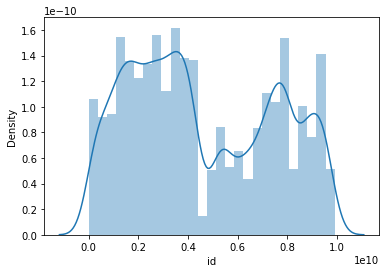

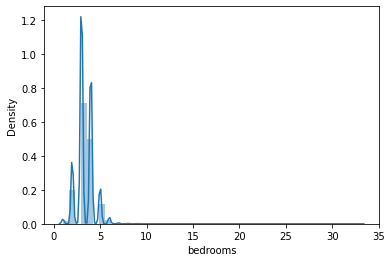

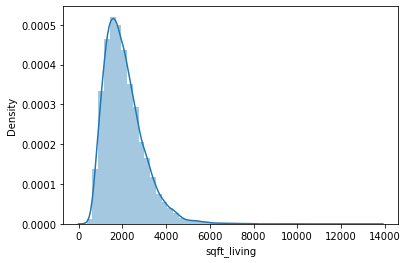

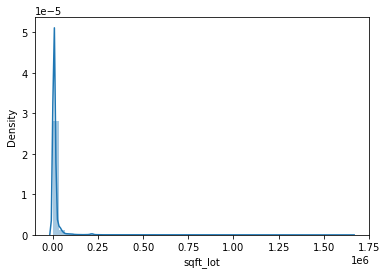

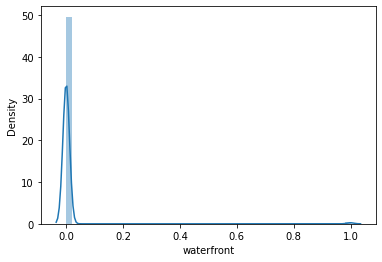

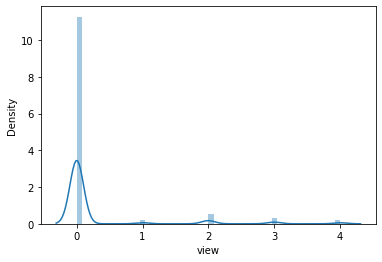

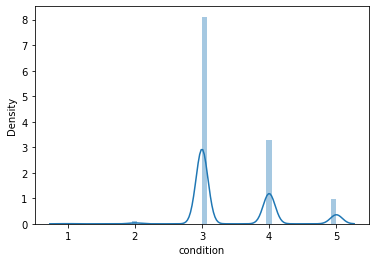

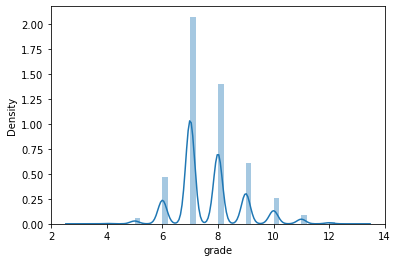

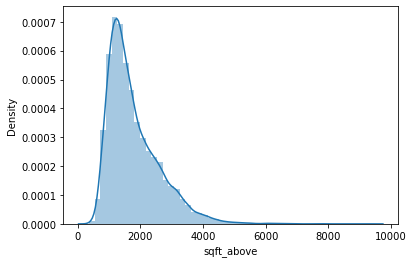

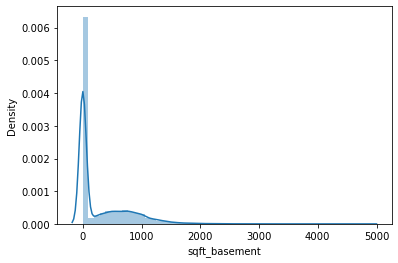

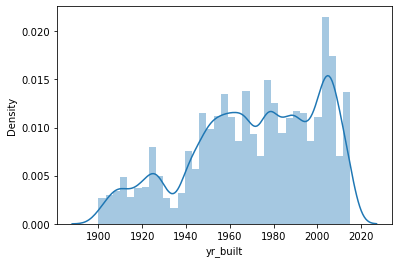

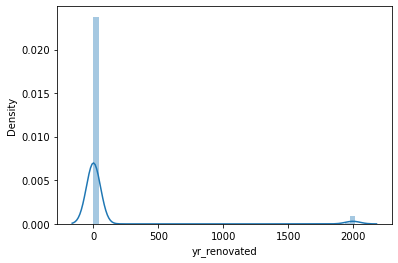

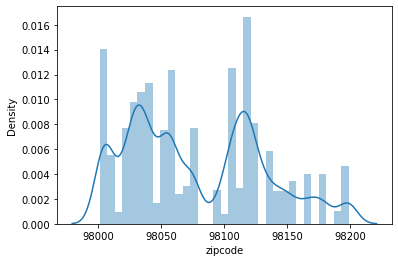

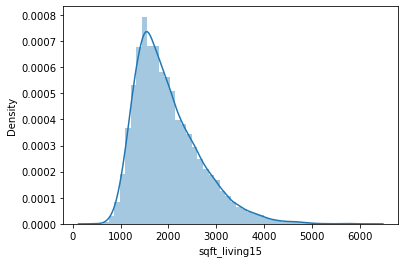

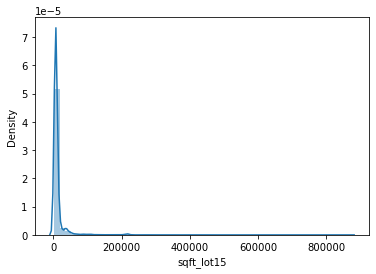

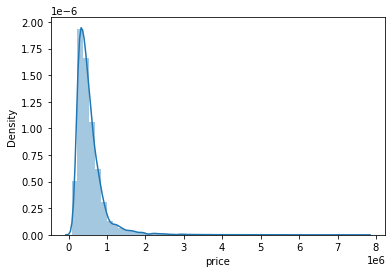

In [10]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

In [11]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

date bathrooms floors      lat      long
0  10/13/2014         1      1  47,5112  -122,257
1   12/9/2014      2,25      2   47,721  -122,319
2   2/25/2015         1      1  47,7379  -122,233
3   12/9/2014         3      1  47,5208  -122,393
4   2/18/2015         2      1  47,6168  -122,045

In [12]:
data.set_index('id', inplace=True)

In [13]:
pd.set_option("display.max_rows", 50)
pd.get_option("display.max_columns")
data.index.value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [14]:
#data.reset_index(level=0, inplace=True)


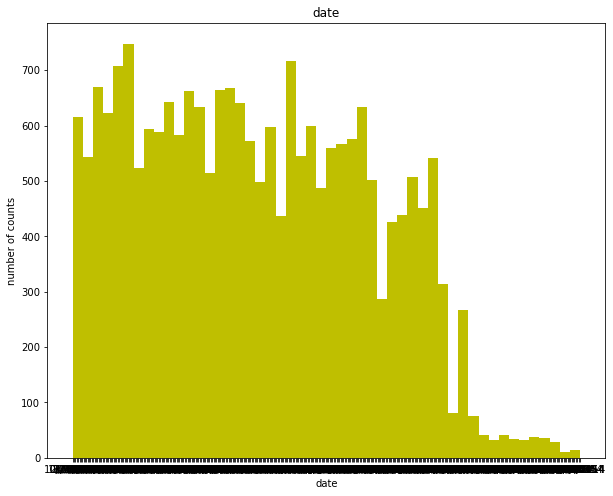

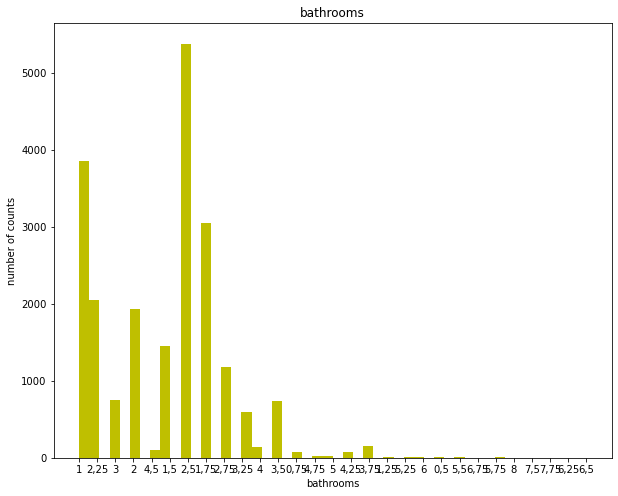

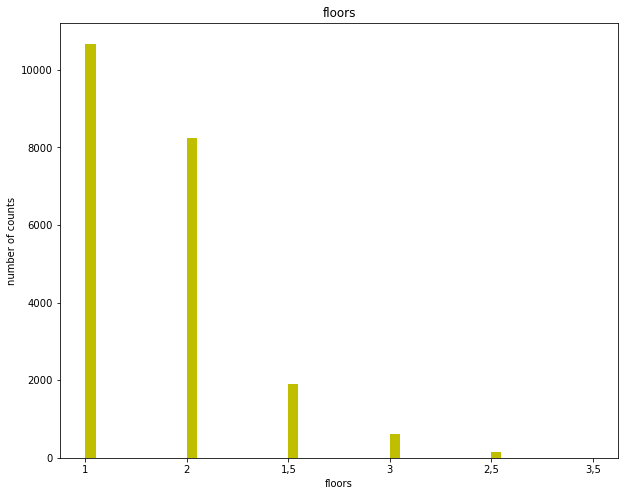

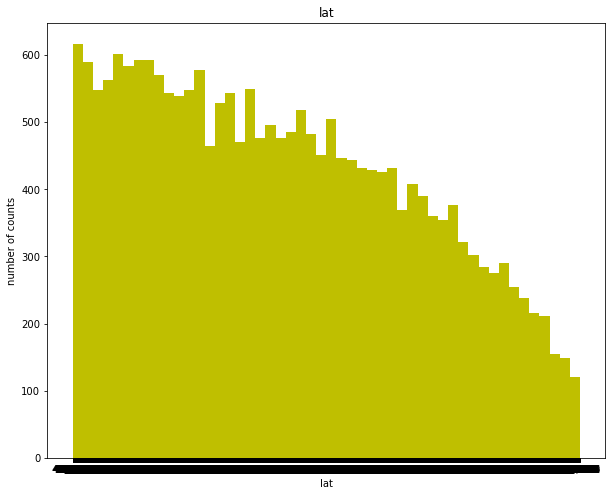

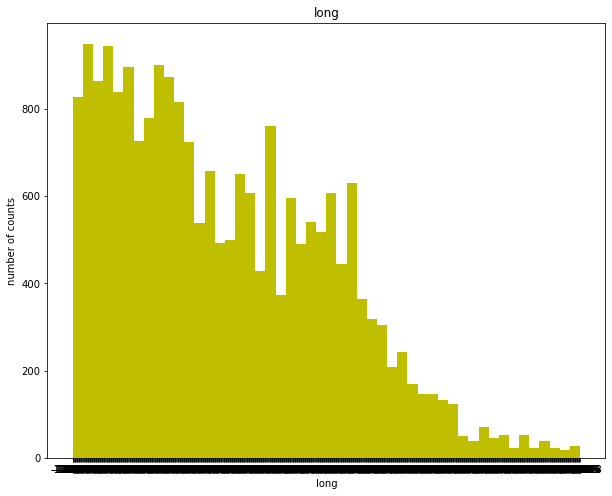

In [15]:
for col in data.select_dtypes(np.object).columns:
    plt.figure(figsize=[10,8])
    n, bins, patches = plt.hist(data[col],50,  density=False, facecolor='y', alpha=1, stacked=True)
    plt.xlabel(col)
    plt.ylabel('number of counts')
    plt.title(col)
    
    plt.show()

In [16]:
data['date'].unique() # 2014-2015 selling date of houses

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

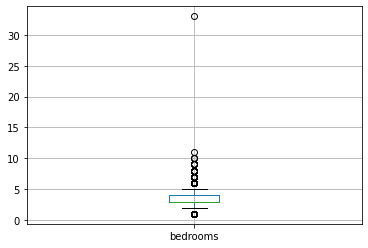

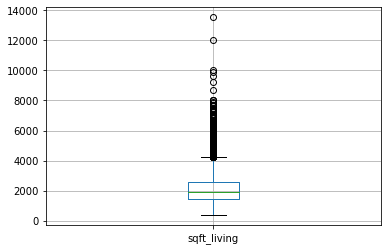

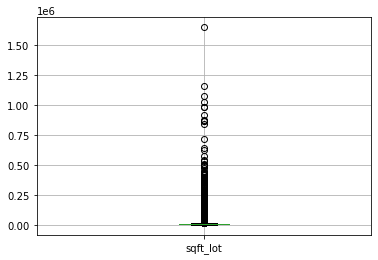

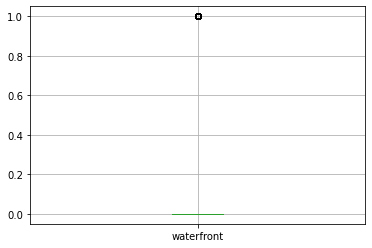

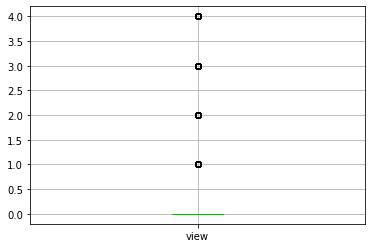

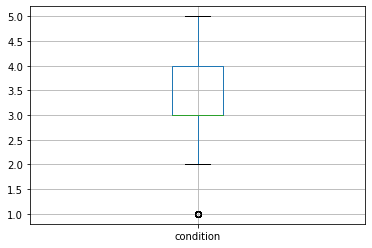

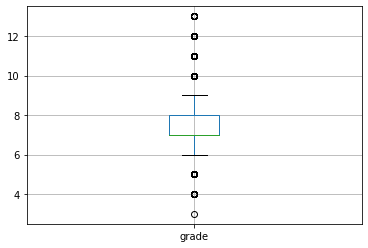

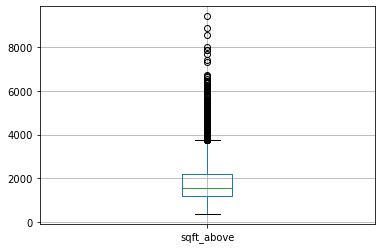

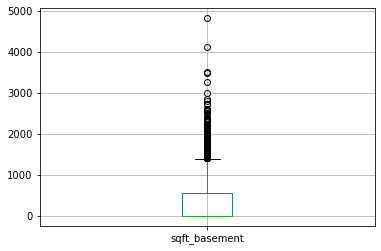

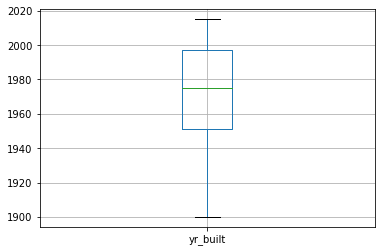

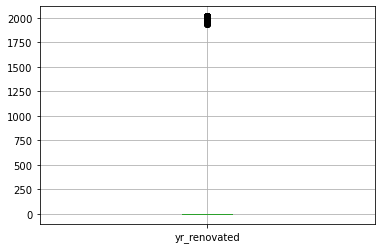

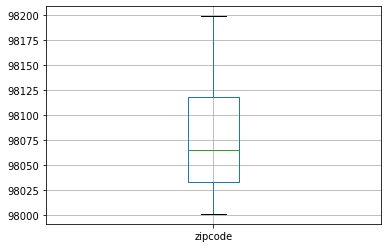

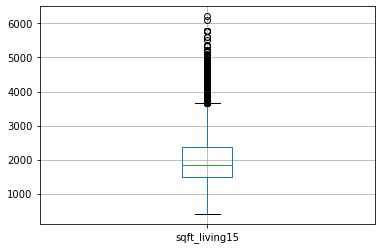

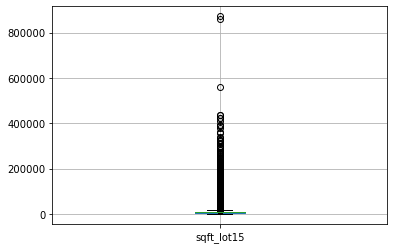

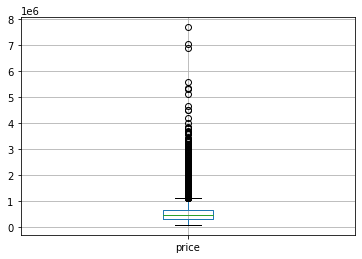

In [17]:
for i in (data.select_dtypes(np.number).columns):
    boxplot = data.boxplot(i)
    boxplot.plot()
    plt.show()

In [18]:
#data.select_dtypes(np.number).columns
#data

In [19]:
#data2 # macht keien Sinn bedrooms zu normieren... Vielleicht nur die continious data normieren?

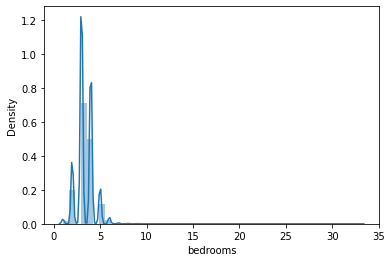

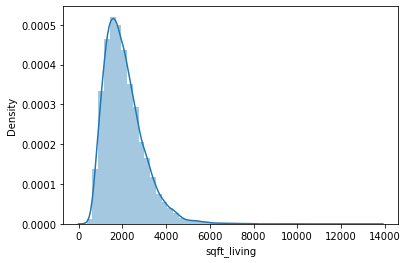

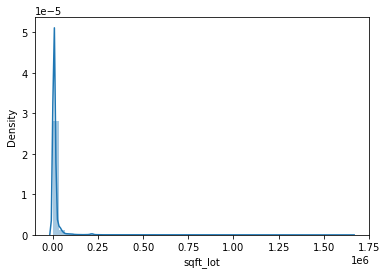

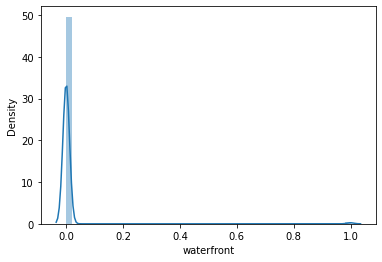

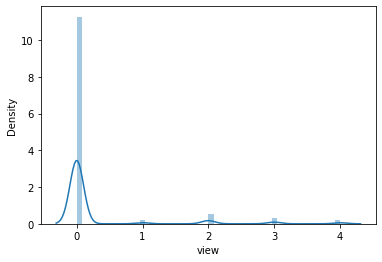

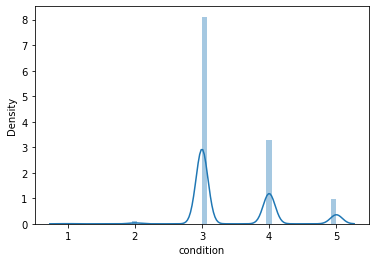

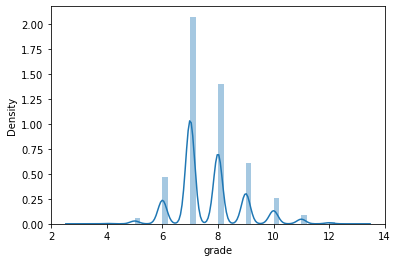

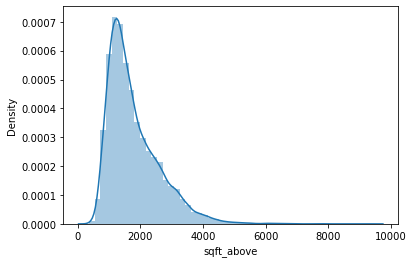

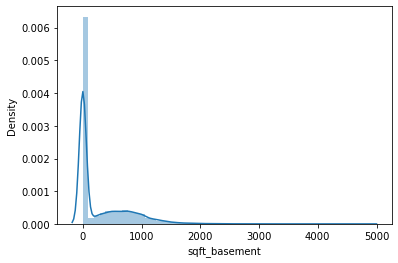

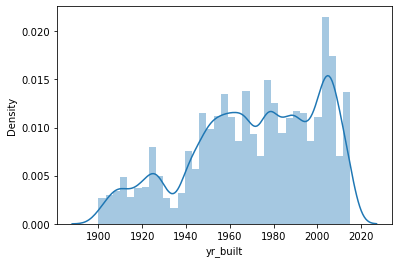

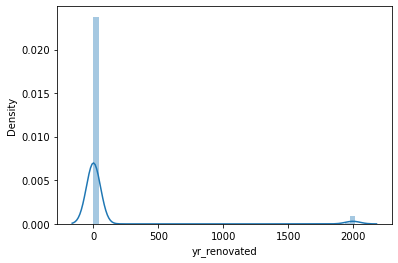

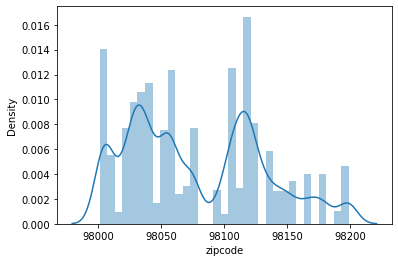

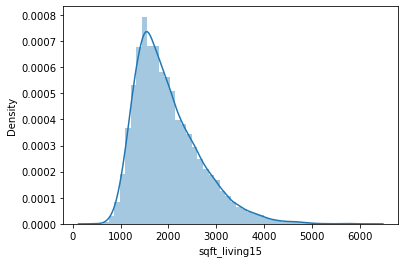

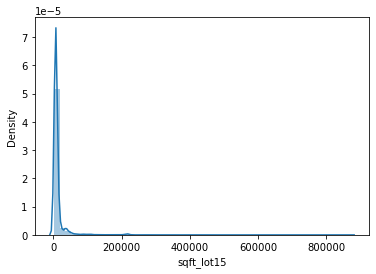

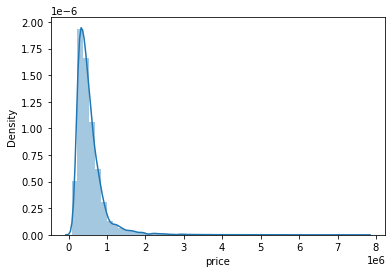

In [20]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

In [21]:
pd.set_option('display.max_rows', 110) 
data['yr_renovated'].value_counts()
#so I think it it is reasonable to drop this column: Most of houses 96% seem not being getting
# renovated
# or group it by 3 groups:
#renovation =0 (=no renovation)
#renovation =1  (renovation before 2000)
#renovation=2 (renovation being taken place in 2000 or closer to now)
#it will be used later in the notebook.

0       20683
2014       91
2013       37
2003       36
2007       35
2000       35
2005       35
2004       26
1990       25
2006       24
2009       22
2002       22
1989       22
1991       20
1994       19
1993       19
1998       19
2001       19
2010       18
1983       18
2008       18
1984       18
1987       18
1986       17
1985       17
1992       17
1999       17
1995       16
2015       16
1988       15
1996       15
1997       15
2011       13
1980       11
2012       11
1982       11
1979       10
1970        9
1968        8
1977        8
1978        6
1975        6
1964        5
1981        5
1958        5
1965        5
1973        5
1960        4
1972        4
1963        4
1969        4
1976        3
1956        3
1945        3
1957        3
1953        3
1974        3
1955        3
1950        2
1967        2
1971        2
1940        2
1962        2
1946        2
1934        1
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, 

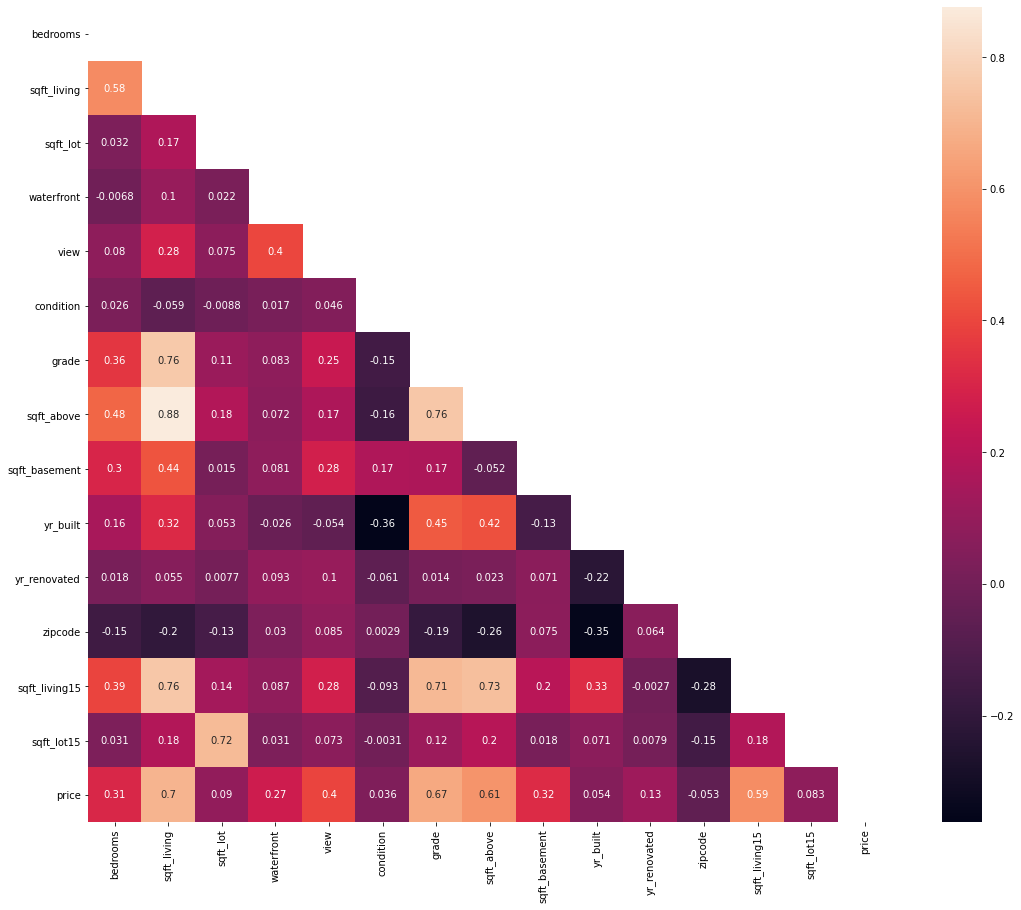

In [22]:
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [23]:
def obj_to_float(df, columns_=[]):
    cols_float=[]
    for cols in columns_[:]:
        cols_float=[]
        for i in df[cols]:
            cols_float.append(pd.to_numeric(str(i).replace(',','.')).astype(float))
        df[cols]=cols_float
        cols_float=[]
    return(df)

### lat and long  have to much data, as they could be used as dummified encoded data for the model
### so I change them into floats data type

In [24]:
data=obj_to_float(data, ['lat','long'])

In [25]:
results1 = pd.get_dummies(data, drop_first=True) 
results1

bedrooms  sqft_living  sqft_lot  waterfront  view  condition  \
id                                                                         
7129300520         3         1180      5650           0     0          3   
6414100192         3         2570      7242           0     0          3   
5631500400         2          770     10000           0     0          3   
2487200875         4         1960      5000           0     0          5   
1954400510         3         1680      8080           0     0          3   
...              ...          ...       ...         ...   ...        ...   
263000018          3         1530      1131           0     0          3   
6600060120         4         2310      5813           0     0          3   
1523300141         2         1020      1350           0     0          3   
291310100          3         1600      2388           0     0          3   
1523300157         2         1020      1076           0     0          3   

            grade  sqft_above  sqft_basement  yr_built  ...  bathrooms_6,5  \
id                                                      ...                  
7129300520      7        1180              0      1955  ...              0   
6414100192      7        2170            400      1951  ...              0   
5631500400      6         770              0      1933  ...              0   
2487200875      7        1050            910      1965  ...              0   
1954400510      8        1680              0      1987  ...              0   
...           ...         ...            ...       ...  ...            ...   
263000018       8        1530              0      2009  ...              0   
6600060120      8        2310              0      2014  ...              0   
1523300141      7        1020              0      2009  ...              0   
291310100       8        1600              0      2004  ...              0   
1523300157      7        1020              0      2008  ...              0   

            bathrooms_6,75  bathrooms_7,5  bathrooms_7,75  bathrooms_8  \
id                                                                       
7129300520               0              0               0            0   
6414100192               0              0               0            0   
5631500400               0              0               0            0   
2487200875               0              0               0            0   
1954400510               0              0               0            0   
...                    ...            ...             ...          ...   
263000018                0              0               0            0   
6600060120               0              0               0            0   
1523300141               0              0               0            0   
291310100                0              0               0            0   
1523300157               0              0               0            0   

            floors_1,5  floors_2  floors_2,5  floors_3  floors_3,5  
id                                                                  
7129300520           0         0           0         0           0  
6414100192           0         1           0         0           0  
5631500400           0         0           0         0           0  
2487200875           0         0           0         0           0  
1954400510           0         0           0         0           0  
...                ...       ...         ...       ...         ...  
263000018            0         0           0         1           0  
6600060120           0         1           0         0           0  
1523300141           0         1           0         0           0  
291310100            0         1           0         0           0  
1523300157           0         1           0         0           0  

[21597 rows x 421 columns]

### Creating a function, which takes the data frame,  splits them into target and features and afterwards does the train/test-split. In this function a fitting model can be inserted and it returns the R^2,  MAE and MSE score values.

In [26]:
def regression_results(df, target, model):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    model.fit(X_train, y_train)
    predictions= model.predict(X_test)
    #return (model.score(X_test, y_test))
    return(r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), 
        mean_squared_error(y_test, predictions, squared=False))
   

In [27]:
# modifaction of the function before, in order to plot predictions against trues of 
#target values.
def predictions(df, target, model):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model.fit(X_train, y_train)
    return(model.predict(X_test), y_test)

## Results for unmodified data (except for 'lat' and 'long')

In [28]:
R2_lin, MAE_lin, MSE_lin =regression_results(results1, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.6633218009692994 MAE: 124473.79367467438 MSE: 211288.9318000345


In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)

In [30]:
R2_knn, MAE_knn, MSE_knn =regression_results(results1, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.4559856252659741 MAE: 164041.55246913582 MSE: 268580.474960129


In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
regr = MLPRegressor(random_state=1, max_iter=500)

In [32]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results1, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5027066770810694 MAE: 171229.19171289526 MSE: 256788.49610684745


In [33]:
data1=data.copy()
data1['date']

id
7129300520    10/13/2014
6414100192     12/9/2014
5631500400     2/25/2015
2487200875     12/9/2014
1954400510     2/18/2015
                 ...    
263000018      5/21/2014
6600060120     2/23/2015
1523300141     6/23/2014
291310100      1/16/2015
1523300157    10/15/2014
Name: date, Length: 21597, dtype: object

### Dealing with yr_built and yr_renovated:
### Replace them with a new column, that takes the age from the time, the house was either  renovated or if it has been not renovated from the time it has been built. (The time it took, from when the house appears as 'new looking'.)

In [34]:
data1=data.copy()
date=[]
for i in data1['date']:
    date.append(int(pd.to_datetime(i, format='%m/%d/%Y').strftime('%Y')))
date
date_min_yr_built=date-data1['yr_built']
date_min_yr_built
date_min_yr_renovated=date-data1['yr_renovated']
date_min_yr_renovated
for i in (0,len(date_min_yr_renovated)-1):
    date[i]

#print(len(date), len(date_min_yr_renovated), len (date_min_yr_built) )

In [35]:
date=[]
for i in data1['date']:
    date.append(int(pd.to_datetime(i, format='%m/%d/%Y').strftime('%Y')))
date_min_yr_built=date-data1['yr_built']
date_min_yr_renovated=date-data1['yr_renovated']

In [36]:
since_last_new=[]
for i in range (0,len(date)):
    if date_min_yr_renovated.iloc[i]==date[i]:
        since_last_new.append(date_min_yr_built.iloc[i])
    else:
        since_last_new.append(date_min_yr_renovated.iloc[i])
    i=i+1
data1['new_or_renovated']=since_last_new
data1['new_or_renovated'].value_counts().sort_index()

    

-1       18
 0      516
 1      330
 2      190
 3      178
       ... 
 111     42
 112     31
 113     27
 114     54
 115     21
Name: new_or_renovated, Length: 117, dtype: int64

In [37]:
data1.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'new_or_renovated'],
      dtype='object')

In [38]:
data2=data1.drop(['yr_renovated','yr_built','date'], axis=1)
data2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price', 'new_or_renovated'],
      dtype='object')

In [39]:
results2 = pd.get_dummies(data2, drop_first=True) 
results2

bedrooms  sqft_living  sqft_lot  waterfront  view  condition  \
id                                                                         
7129300520         3         1180      5650           0     0          3   
6414100192         3         2570      7242           0     0          3   
5631500400         2          770     10000           0     0          3   
2487200875         4         1960      5000           0     0          5   
1954400510         3         1680      8080           0     0          3   
...              ...          ...       ...         ...   ...        ...   
263000018          3         1530      1131           0     0          3   
6600060120         4         2310      5813           0     0          3   
1523300141         2         1020      1350           0     0          3   
291310100          3         1600      2388           0     0          3   
1523300157         2         1020      1076           0     0          3   

            grade  sqft_above  sqft_basement  zipcode  ...  bathrooms_6,5  \
id                                                     ...                  
7129300520      7        1180              0    98178  ...              0   
6414100192      7        2170            400    98125  ...              0   
5631500400      6         770              0    98028  ...              0   
2487200875      7        1050            910    98136  ...              0   
1954400510      8        1680              0    98074  ...              0   
...           ...         ...            ...      ...  ...            ...   
263000018       8        1530              0    98103  ...              0   
6600060120      8        2310              0    98146  ...              0   
1523300141      7        1020              0    98144  ...              0   
291310100       8        1600              0    98027  ...              0   
1523300157      7        1020              0    98144  ...              0   

            bathrooms_6,75  bathrooms_7,5  bathrooms_7,75  bathrooms_8  \
id                                                                       
7129300520               0              0               0            0   
6414100192               0              0               0            0   
5631500400               0              0               0            0   
2487200875               0              0               0            0   
1954400510               0              0               0            0   
...                    ...            ...             ...          ...   
263000018                0              0               0            0   
6600060120               0              0               0            0   
1523300141               0              0               0            0   
291310100                0              0               0            0   
1523300157               0              0               0            0   

            floors_1,5  floors_2  floors_2,5  floors_3  floors_3,5  
id                                                                  
7129300520           0         0           0         0           0  
6414100192           0         1           0         0           0  
5631500400           0         0           0         0           0  
2487200875           0         0           0         0           0  
1954400510           0         0           0         0           0  
...                ...       ...         ...       ...         ...  
263000018            0         0           0         1           0  
6600060120           0         1           0         0           0  
1523300141           0         1           0         0           0  
291310100            0         1           0         0           0  
1523300157           0         1           0         0           0  

[21597 rows x 49 columns]

### results with modified data regarding 'yr_renovated', 'yr_built'

In [40]:
R2_lin, MAE_lin, MSE_lin =regression_results(results2, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.6574632179955832 MAE: 124230.42379465401 MSE: 213119.337029743


In [41]:
R2_knn, MAE_knn, MSE_knn =regression_results(results2, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.44805189822116476 MAE: 164404.10498971195 MSE: 270531.83096449525


In [42]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results2, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5956369231358526 MAE: 148363.37874777263 MSE: 231555.44404764575


In [43]:
data1=data.copy()
yr_renovated_grouped=[]
for i in data1['yr_renovated']:
    if i==0:
        yr_renovated_grouped.append('no') 
    elif i < 2000:
        yr_renovated_grouped.append('old')
    else:
        yr_renovated_grouped.append('new')

data1['renovated']=yr_renovated_grouped
data1=data1.drop('yr_renovated', axis=1)

In [44]:
results3 = pd.get_dummies(data1, drop_first=True) 
#results3

In [45]:
R2_lin, MAE_lin, MSE_lin =regression_results(results3, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)
#the problem here is probably, that it is not dealt with the column 'date'

Using Linear Regression gives scores as follows, R^2: -1.674482131144221 MAE: 132451.10016570002 MSE: 595510.0567818154


In [46]:
R2_knn, MAE_knn, MSE_knn =regression_results(results3, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.4487229888996136 MAE: 164346.76697530865 MSE: 270367.3167573046


In [47]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results3, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5693331433529278 MAE: 155719.01952669866 MSE: 238968.12447541085


#### putting zipcode into categorical, because it has no meaning as number

In [48]:
data1=data.copy()
data1['zipcode']=data1['zipcode'].astype(object)
data1.dtypes

date              object
bedrooms           int64
bathrooms         object
sqft_living        int64
sqft_lot           int64
floors            object
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [49]:
results4 = pd.get_dummies(data1, drop_first=True) 
#results4

In [50]:
R2_lin, MAE_lin, MSE_lin =regression_results(results4, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7758527517175889 MAE: 95051.92433922343 MSE: 172399.48162078776


In [51]:
#it is a very good improvement having put zipcodes into categoricals 

In [52]:
R2_knn, MAE_knn, MSE_knn =regression_results(results4, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.4528234507998311 MAE: 164616.99650205762 MSE: 269359.9283728001


In [53]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results4, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.513601308812482 MAE: 166653.36538468843 MSE: 253960.07615063185


#### Dealing with bedrooms: putting them into categoricals and encoding them, since it might the popularity of them is not linear to number

In [54]:
data1=data.copy()
data1[['bedrooms','zipcode']]=data1[['bedrooms','zipcode']].astype(object)
data1.dtypes

date              object
bedrooms          object
bathrooms         object
sqft_living        int64
sqft_lot           int64
floors            object
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [55]:
results5 = pd.get_dummies(data1, drop_first=True) 
#results5

#### results with data having put bedrooms into categoricals

In [56]:
R2_lin, MAE_lin, MSE_lin =regression_results(results5, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7765172563587202 MAE: 94958.58136237015 MSE: 172143.74507109923


#### it is a tiny improvement (0.1%), and also the MAE and MSE improved some what: So it will be applied. 

In [58]:
R2_knn, MAE_knn, MSE_knn =regression_results(results5, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.45283252861001033 MAE: 164614.4244855967 MSE: 269357.6939857043


In [59]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results5, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5094422234896709 MAE: 167915.9998337328 MSE: 255043.5425802474


#### putting bathrooms into floats

In [60]:
data1=data.copy()
results6=obj_to_float(data1,['bathrooms'])

In [61]:
results6 = pd.get_dummies(results5, drop_first=True)

In [62]:
R2_lin, MAE_lin, MSE_lin =regression_results(results6, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7765172563587202 MAE: 94958.58136237015 MSE: 172143.74507109923


In [ ]:
#the score doesn't get no better no worse

In [64]:
R2_knn, MAE_knn, MSE_knn =regression_results(results6, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.45283252861001033 MAE: 164614.4244855967 MSE: 269357.6939857043


In [65]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results6, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5094422234896709 MAE: 167915.9998337328 MSE: 255043.5425802474


In [66]:
#having put bathrooms to categoricals does not effct the score, it will just be kept as floats

#### putting column ['condition'] to categoricals:

In [69]:
data1=data.copy()
data1[['bedrooms','zipcode','condition']]=data1[['bedrooms','zipcode','condition']].astype(object)
data1.dtypes

date              object
bedrooms          object
bathrooms         object
sqft_living        int64
sqft_lot           int64
floors            object
waterfront         int64
view               int64
condition         object
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [70]:
results7 = pd.get_dummies(data1, drop_first=True) 

In [71]:
R2_lin, MAE_lin, MSE_lin =regression_results(results7, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7766867122302705 MAE: 95061.32819492364 MSE: 172078.46866617096


In [72]:
R2_knn, MAE_knn, MSE_knn =regression_results(results7, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.45282200830734465 MAE: 164628.0561728395 MSE: 269360.28342220536


In [73]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results7, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5096252297608386 MAE: 168011.70385638188 MSE: 254995.96518586593


#### a tiny tiny improvement, 'condition' will be kept as categoricals

### putting 'view' into categoricals

In [76]:
data1=data.copy()
data1[['bedrooms','zipcode','condition','view']]=data1[['bedrooms','zipcode','condition','view']].astype(object)

In [77]:
results8 = pd.get_dummies(data1, drop_first=True) 

In [78]:
R2_lin, MAE_lin, MSE_lin =regression_results(results8, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7771778000914349 MAE: 94779.38484154038 MSE: 171889.1557995168


In [79]:
R2_knn, MAE_knn, MSE_knn =regression_results(results8, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.45282200830734465 MAE: 164628.0561728395 MSE: 269360.28342220536


In [80]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results8, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5341702367762291 MAE: 162743.4639974763 MSE: 248532.3157755557


#### improvement, view will be kept as categorical

### putting waterfront to categoricals

In [83]:
data1=data.copy()
data1[['bedrooms','zipcode','condition','view','waterfront']]=data1[['bedrooms','zipcode','condition','view','waterfront']].astype(object)

In [84]:
results9 = pd.get_dummies(data1, drop_first=True) 

In [85]:
R2_lin, MAE_lin, MSE_lin =regression_results(results9, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7771778000917791 MAE: 94779.3848409976 MSE: 171889.15579938405


In [86]:
R2_knn, MAE_knn, MSE_knn =regression_results(results9, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.45282200830734465 MAE: 164628.0561728395 MSE: 269360.28342220536


In [87]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results9, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.5075575228963307 MAE: 168784.0721492449 MSE: 255533.00573366956


### at least the score is not getting worse, it will be kept!

### putting date into month and putting it into categoricals,
### also dropping column 'date'


In [90]:
data1=data.copy()
date_number=[]
for i in data1['date']:
    date_number.append(int(pd.to_datetime(i, format='%m/%d/%Y').strftime('%m')))
data1['date_month']=date_number

#data1=data1.drop(['date'], axis=1)

In [91]:
date_number=[]
for i in data1['date']:
    date_number.append(int(pd.to_datetime(i, format='%m/%d/%Y').strftime('%Y%m%d')))
data1['date_number']=date_number

In [92]:
data1=data1.drop(['date'],axis=1)

In [93]:
data1[['bedrooms','zipcode','condition','view','date_month']]=data1[['bedrooms','zipcode','condition','view','date_month']].astype(object)

In [94]:
results10 = pd.get_dummies(data1, drop_first=True) 

In [95]:
R2_lin, MAE_lin, MSE_lin =regression_results(results10, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7839155718811962 MAE: 92515.85232559424 MSE: 169270.38630076064


In [96]:
R2_knn, MAE_knn, MSE_knn =regression_results(results10, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.4337189489476976 MAE: 167201.2837962963 MSE: 274021.8944734464


In [97]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(results10, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.49788977707613025 MAE: 171579.63941116782 MSE: 258029.15587967183


#### it is a little improvement, it will be applied this way.

### Now working with the last dataframe (results10) and normalize the data and remove outlieres from target

In [98]:
def normalize(df, non_col=[]):
    result = df.copy()
    for feature_name in df.select_dtypes(np.number).columns:
        if feature_name not in non_col :
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
            
        else:
            continue
    return result

In [107]:
data_norm=normalize(results10,non_col=['price'])
data_norm=data_norm.drop(['lat','long'], axis=1)


In [111]:
#data_norm['price']

id
7129300520    221900
6414100192    538000
5631500400    180000
2487200875    604000
1954400510    510000
               ...  
263000018     360000
6600060120    400000
1523300141    402101
291310100     400000
1523300157    325000
Name: price, Length: 21597, dtype: int64

In [101]:
#for feature_name in results4.select_dtypes(np.number).columns:
 #   if feature_name != 'price' :
  #      max_value = results4[feature_name].max()
   #     min_value = results4[feature_name].min()
     #   results4[feature_name] = (results4[feature_name] - min_value) / (max_value - min_value)
    #else:
      #  continue
#results4

In [112]:
R2_lin, MAE_lin, MSE_lin =regression_results(data_norm, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.7838287508109482 MAE: 92485.15902499293 MSE: 169304.3886588101


In [113]:
R2_knn, MAE_knn, MSE_knn =regression_results(data_norm, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.45131883009539986 MAE: 142399.04418724278 MSE: 269730.0157754113


In [114]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(data_norm, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.29791254653446086 MAE: 183620.21932496506 MSE: 305115.91120971966


### Remove outliers in the target 'price':

In [115]:
def remove_outliers_target(df,threshold, target):
    upper = np.percentile(df[target],75)
    lower = np.percentile(df[target],25)
    iqr = upper - lower
    upper_limit = upper + threshold * iqr
    lower_limit = lower - threshold * iqr
    df = df[(df[target]>lower_limit) & (df[target]<upper_limit)]
    return df

In [118]:
data_ro=remove_outliers_target(data_norm, 1.5,  'price')
data_ro

sqft_living  sqft_lot  waterfront  grade  sqft_above  \
id                                                                 
7129300520     0.061503  0.003108         0.0    0.4    0.089602   
6414100192     0.167046  0.004072         0.0    0.4    0.199115   
5631500400     0.030372  0.005743         0.0    0.3    0.044248   
2487200875     0.120729  0.002714         0.0    0.4    0.075221   
1954400510     0.099468  0.004579         0.0    0.5    0.144912   
...                 ...       ...         ...    ...         ...   
263000018      0.088079  0.000370         0.0    0.5    0.128319   
6600060120     0.147304  0.003206         0.0    0.5    0.214602   
1523300141     0.049355  0.000503         0.0    0.4    0.071903   
291310100      0.093394  0.001132         0.0    0.5    0.136062   
1523300157     0.049355  0.000337         0.0    0.4    0.071903   

            sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  \
id                                                                             
7129300520       0.000000  0.478261      0.000000       0.161934    0.005742   
6414100192       0.082988  0.443478      0.988089       0.222165    0.008027   
5631500400       0.000000  0.286957      0.000000       0.399415    0.008513   
2487200875       0.188797  0.565217      0.000000       0.165376    0.004996   
1954400510       0.000000  0.756522      0.000000       0.241094    0.007871   
...                   ...       ...           ...            ...         ...   
263000018        0.000000  0.947826      0.000000       0.194631    0.000986   
6600060120       0.000000  0.991304      0.000000       0.246257    0.007523   
1523300141       0.000000  0.947826      0.000000       0.106866    0.001558   
291310100        0.000000  0.904348      0.000000       0.173980    0.000731   
1523300157       0.000000  0.939130      0.000000       0.106866    0.000811   

            ...  date_month_3  date_month_4  date_month_5  date_month_6  \
id          ...                                                           
7129300520  ...           0.0           0.0           0.0           0.0   
6414100192  ...           0.0           0.0           0.0           0.0   
5631500400  ...           0.0           0.0           0.0           0.0   
2487200875  ...           0.0           0.0           0.0           0.0   
1954400510  ...           0.0           0.0           0.0           0.0   
...         ...           ...           ...           ...           ...   
263000018   ...           0.0           0.0           1.0           0.0   
6600060120  ...           0.0           0.0           0.0           0.0   
1523300141  ...           0.0           0.0           0.0           1.0   
291310100   ...           0.0           0.0           0.0           0.0   
1523300157  ...           0.0           0.0           0.0           0.0   

            date_month_7  date_month_8  date_month_9  date_month_10  \
id                                                                    
7129300520           0.0           0.0           0.0            1.0   
6414100192           0.0           0.0           0.0            0.0   
5631500400           0.0           0.0           0.0            0.0   
2487200875           0.0           0.0           0.0            0.0   
1954400510           0.0           0.0           0.0            0.0   
...                  ...           ...           ...            ...   
263000018            0.0           0.0           0.0            0.0   
6600060120           0.0           0.0           0.0            0.0   
1523300141           0.0           0.0           0.0            0.0   
291310100            0.0           0.0           0.0            0.0   
1523300157           0.0           0.0           0.0            1.0   

            date_month_11  date_month_12  
id                                        
7129300520            0.0            0.0  
6414100192            0.0            1.0  
5631500400    

In [119]:
R2_lin, MAE_lin, MSE_lin =regression_results(data_ro, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)

Using Linear Regression gives scores as follows, R^2: 0.8403652192068627 MAE: 61073.24191192281 MSE: 82200.01293770211


In [120]:
R2_knn, MAE_knn, MSE_knn =regression_results(data_ro, 'price', knn)
print('Using KNeighborsRegressor gives scores as follows, R^2:',R2_knn, 'MAE:',MAE_knn,'MSE:', MSE_knn)

Using KNeighborsRegressor gives scores as follows, R^2: 0.4306393443102601 MAE: 112104.107469015 MSE: 155239.36308903582


In [121]:
R2_mlp, MAE_mlp, MSE_mlp =regression_results(data_ro, 'price', regr)
print('Using MLPRegressor gives scores as follows, R^2:',R2_mlp, 'MAE:', MAE_mlp, 'MSE:',MSE_mlp)

Using MLPRegressor gives scores as follows, R^2: 0.37938267194210407 MAE: 130862.62787356593 MSE: 162076.5092356239


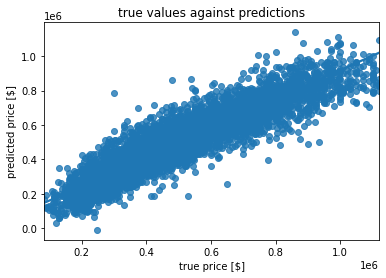

<Figure size 432x288 with 0 Axes>

In [150]:
pred, true =predictions(data_ro, 'price', LinearRegression())

fig= sns.regplot(true, pred)
plt.xlabel("true price [$]")
plt.ylabel("predicted price [$]")
plt.title("true values against predictions")
plt.show(fig)
#plt.savefig("best_result_pred_trues.png")

## These are the best results:
## having put 'bedrooms','zipcode','condition','view','date_month' into categoricals
## droping columns 'date' , 'lat' , 'long'
## Having Normalized data, having removed outliers from the 'price' values
## Using Linear Regression gives scores as follows:
## R^2: 0.84 MAE: 61073 MSE: 82200


### +  attempt of a simple filter tool, in order to filter out the houses aiming prices above 650000$
### Filtering on two parameters,which have the most highest correlation with the price value 
#### First round only data grade >= 8 and sqft_living >= 890
#### the used data is 'results10', because the data needs to be unnormalized, so the grade can be choosen.

In [124]:
data_filter=results10.copy()

#data_filter_2=data_filter.copy()
indexNames= data_filter.index[data_filter['grade'] <8].tolist()
data_filter=data_filter.drop(indexNames)

indexNames= data_filter.index[data_filter['sqft_living'] <890].tolist()
data_filter=data_filter.drop(indexNames)

#group_data=data.groupby(['Zipcode'], sort=False)['Price'].max()
#Zipcode_list=(goup_data[goup_data<650000])

#indexNames_3= data_filter_2.index[data_filter_2['Zipcode'].isin(Zipcode_list)]].tolist()

In [125]:
dataUnder650k=[]
for i in range (0, len(data_filter['price'])):
    if data_filter['price'].iloc[i]<= 650000:
        dataUnder650k.append(data_filter['price'].iloc[i])
    else:
        continue
len(dataUnder650k)
#number houses below 650000 $ in the filtered dataset

5772

In [126]:
dataHigher650k=[]
for i in range (0, len(data_filter['price'])):
    if data_filter['price'].iloc[i]> 650000:
        dataHigher650k.append(data_filter['price'].iloc[i])
    else:
        continue
len(dataHigher650k)
# number houses above 650000 $ in filtered data:

4530

In [127]:
dataUnfilteredHigher650k=[]
for i in range (0, len(data['price'])):
    if data['price'].iloc[i]> 650000:
        dataUnfilteredHigher650k.append(data['price'].iloc[i])
    else:
        continue
len(dataUnfilteredHigher650k)
#number houses higher 650000 $ in original data set

5205

In [128]:
# compare ration of (filtered data < 650k$)/ (total filtered data > 650k$)
len(dataUnder650k)/len(dataHigher650k)
#ration houses below 650k/ houses above 650k

1.2741721854304635

In [129]:
#ratio filtered higher 650k/ unfiltered higher 650k
len(dataHigher650k)/len(dataUnfilteredHigher650k)
# only 87% of the houses having prices higher then 650000$ are kept in the filtered data 
#from the original data.

0.8703170028818443

In [133]:
R2_lin, MAE_lin, MSE_lin =regression_results(data_filter, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)
# the R^2 is in the range of the score for the rsults 10 of the whole data set, but the MAE
#is worse. Normalization of the results and removing outliers does not work out, because I get
# in some columns Null values. Which needs to be fixed first...

Using Linear Regression gives scores as follows, R^2: 0.7698716403558125 MAE: 119654.75581682406 MSE: 225807.4969142798


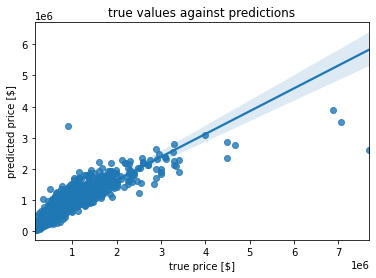

In [134]:
pred, true =predictions(data_filter, 'price', LinearRegression())

fig= sns.regplot(true, pred)
plt.xlabel("true price [$]")
plt.ylabel("predicted price [$]")
plt.title("true values against predictions")
plt.show(fig)

In [ ]:
### Filter Round 2:
#### choosing only houses with grade 9 and higher and keep the filter on sqft_living >= 890

In [135]:
data_filter=results10.copy()

#data_filter_2=data_filter.copy()
indexNames= data_filter.index[data_filter['grade'] <9].tolist()
data_filter=data_filter.drop(indexNames)

indexNames= data_filter.index[data_filter['sqft_living'] <890].tolist()
data_filter=data_filter.drop(indexNames)

#group_data=data.groupby(['Zipcode'], sort=False)['Price'].max()
#Zipcode_list=(goup_data[goup_data<650000])

#indexNames_3= data_filter_2.index[data_filter_2['Zipcode'].isin(Zipcode_list)]].tolist()

In [136]:
dataUnder650k=[]
for i in range (0, len(data_filter['price'])):
    if data_filter['price'].iloc[i]<= 650000:
        dataUnder650k.append(data_filter['price'].iloc[i])
    else:
        continue
len(dataUnder650k)
#only 1128 houses left, which prices are below 650000$

1128

In [137]:
dataHigher650k=[]
for i in range (0, len(data_filter['price'])):
    if data_filter['price'].iloc[i]> 650000:
        dataHigher650k.append(data_filter['price'].iloc[i])
    else:
        continue
len(dataHigher650k)
#3121 houses left, having prices above 650000$

3121

In [138]:
# compare ration of (filtered data < 650k$)/ (total filtered data > 650k$)
len(dataUnder650k)/len(dataHigher650k)


0.3614226209548222

In [139]:
#ratio filtered Higher 650k/ unfiltered Higher 650k
len(dataHigher650k)/len(dataUnfilteredHigher650k)

0.5996157540826129

In [141]:
R2_lin, MAE_lin, MSE_lin =regression_results(data_filter, 'price', LinearRegression())
print('Using Linear Regression gives scores as follows, R^2:' ,R2_lin,'MAE:', MAE_lin, 'MSE:',MSE_lin)
#the model gives results similar to filter round 1. 

Using Linear Regression gives scores as follows, R^2: 0.7788682372855469 MAE: 167884.98761206187 MSE: 264356.60523597564


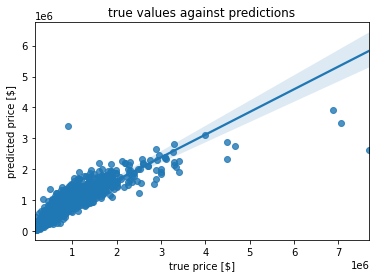

In [131]:
pred, true =predictions(data_filter, 'price', LinearRegression())

fig= sns.regplot(true, pred)
plt.xlabel("true price [$]")
plt.ylabel("predicted price [$]")
plt.title("true values against predictions")
plt.show(fig)

In [ ]:
.. end